In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import re
from datetime import datetime
#elbow method
from sklearn.cluster import KMeans
from sklearn import preprocessing
# from yellowbrick.cluster import silhouette_visualizer
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score


In [722]:
df = pd.read_csv("data.csv", encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [723]:
df.shape[0]

541909

### Handling of Missing Values

Observation:
    
Each model performed very well but we got High Precision and Validation Score on Random Forest Classifier.

    


In [724]:
df_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
df_info = df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null Values'}))
df_info = df_info.append(pd.DataFrame((df.isnull().sum()/df.shape[0])*100).T.rename(index={0:"Null Value %"}))
df_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,object,float64,float64,object
Null Values,0,0,1454,0,0,0,135080,0
Null Value %,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


Observation: Column "Description" and "CustomerID" has null values in it. "Description" = 0.26% "CustomerID" = 24.92 %

Conclusion:

1) I am Dropping 0.26% "Description" values.

2) I am Dropping 24.92% of "CustomerID" bcoz its impossible to fill them using any statistical method.

In [725]:
df.dropna(subset=['Description', "CustomerID"], inplace=True)

In [726]:
df.reset_index(inplace=True)

In [727]:
df_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
df_info = df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null Values'}))
df_info = df_info.append(pd.DataFrame((df.isnull().sum()/df.shape[0])*100).T.rename(index={0:"Null Value %"}))
df_info

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,int64,object,object,object,int64,object,float64,float64,object
Null Values,0,0,0,0,0,0,0,0,0
Null Value %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [728]:
df_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
df_info = df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null Values'}))
df_info = df_info.append(pd.DataFrame((df.isnull().sum()/df.shape[0])*100).T.rename(index={0:"Null Value %"}))
df_info

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,int64,object,object,object,int64,object,float64,float64,object
Null Values,0,0,0,0,0,0,0,0,0
Null Value %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observation:

Now we dont have any Null Values present in our dataset

In [729]:
print('Number of Duplicates: {}'.format(df.duplicated().sum()))

Number of Duplicates: 0


Observation: No Duplicates Present in our Dataset

In [730]:
temp1 = pd.DataFrame(df.groupby(['Country'])['CustomerID'].count())
temp1.reset_index(inplace=True)
temp1

,Country,CustomerID
0,Australia,1259
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32
5,Canada,151
6,Channel Islands,758
7,Cyprus,622
8,Czech Republic,30
9,Denmark,389


In [731]:
fig = px.bar(temp1, x='Country', y='CustomerID',color='Country', title='Customers per Country', height=800)
fig.show()

Observation: Most of the Data Belong to only one Country i.e, United Kingdom

conclusion: It will have very less impact on prediction, so we are going to drop it.

lets drop unnecessary columns from dataframe

In [732]:
df.drop(['Country', 'Description'], axis=1, inplace=True)

In [733]:
df

,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0
1,1,536365,71053,6,12/1/2010 8:26,3.39,17850.0
2,2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0
3,3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0
4,4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...,...,...
406824,541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0
406825,541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0
406826,541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0
406827,541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0


lets drop those records where customer got Discount

In [734]:
df.drop(df[df['StockCode']=="D"].index.tolist(), axis=0, inplace=True)

In [735]:
df

,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0
1,1,536365,71053,6,12/1/2010 8:26,3.39,17850.0
2,2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0
3,3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0
4,4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...,...,...
406824,541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0
406825,541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0
406826,541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0
406827,541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0


lets drop those records where quantity is Negative.

In [736]:
df.drop(df[df['Quantity']<0].index.tolist(), axis=0, inplace=True)

In [737]:
df.reset_index(inplace=True)

In [738]:
df

,level_0,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,0,0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0
1,1,1,536365,71053,6,12/1/2010 8:26,3.39,17850.0
2,2,2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0
3,3,3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0
4,4,4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...,...,...,...
397919,406824,541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0
397920,406825,541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0
397921,406826,541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0
397922,406827,541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0


lets find out Total Price paid by Customer on each Transaction

In [739]:
df['Total_Price'] = df['UnitPrice'] * df['Quantity']

## Extract Recency, Frequency, Monetary (RFM) Metrics¶

lets find out RFM values

Recency: Number of days since a customer's last purchase

Frequency: Number of purchases by the customer

Monetary(Total Price): Total amount of money spent by the customer on his purchases

In [740]:
df

,level_0,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Price
0,0,0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,15.30
1,1,1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,20.34
2,2,2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,22.00
3,3,3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,20.34
4,4,4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,20.34
...,...,...,...,...,...,...,...,...,...
397919,406824,541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,10.20
397920,406825,541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,12.60
397921,406826,541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,16.60
397922,406827,541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,16.60


In [741]:
df_Monetary = df[['CustomerID','Total_Price']].groupby("CustomerID", as_index=False)['Total_Price'].sum()
df_Monetary

,CustomerID,Total_Price
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [742]:
df_Frequency = df[['CustomerID','InvoiceNo']].groupby("CustomerID", as_index=False)['InvoiceNo'].count()
df_Frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [743]:
df_Last_Purchase = df[["CustomerID","InvoiceDate"]].groupby(['CustomerID'], as_index=False)['InvoiceDate'].max()
df_Last_Purchase

,CustomerID,InvoiceDate
0,12346.0,1/18/2011 10:01
1,12347.0,8/2/2011 8:48
2,12348.0,9/25/2011 13:13
3,12349.0,11/21/2011 9:51
4,12350.0,2/2/2011 16:01
...,...,...
4334,18280.0,3/7/2011 9:52
4335,18281.0,6/12/2011 10:53
4336,18282.0,8/5/2011 13:35
4337,18283.0,9/5/2011 12:35


In [744]:
df_Last_Purchase['InvoiceDate'] = pd.to_datetime(df_Last_Purchase['InvoiceDate'])

In [745]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [746]:
days_since_last_purchase = df['InvoiceDate'].max() - df_Last_Purchase['InvoiceDate'] 
days_since_last_purchase = days_since_last_purchase + pd.Timedelta("1 days")
days_since_last_purchase

0      326 days 02:49:00
1      130 days 04:02:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
4334   278 days 02:58:00
4335   181 days 01:57:00
4336   126 days 23:15:00
4337    96 days 00:15:00
4338   202 days 02:11:00
Name: InvoiceDate, Length: 4339, dtype: timedelta64[ns]

In [747]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [748]:
time_diff_in_days = pd.Series(data = [d.days for d in days_since_last_purchase])
time_diff_in_days


0       326
1       130
2        75
3        19
4       310
       ... 
4334    278
4335    181
4336    126
4337     96
4338    202
Length: 4339, dtype: int64

In [749]:
df_final = pd.merge(df_Monesty, df_Frequency, on="CustomerID")
df_final['Recency'] = time_diff_in_days
df_final.rename(columns={"Total_Price": "Monetary", "InvoiceNo": "Frequency"}, inplace=True)
df_final

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,130
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
...,...,...,...,...
4334,18280.0,180.60,10,278
4335,18281.0,80.82,7,181
4336,18282.0,178.05,12,126
4337,18283.0,2094.88,756,96


Create histograms and box plots for RFM features to evaluate the data distribution within each features.



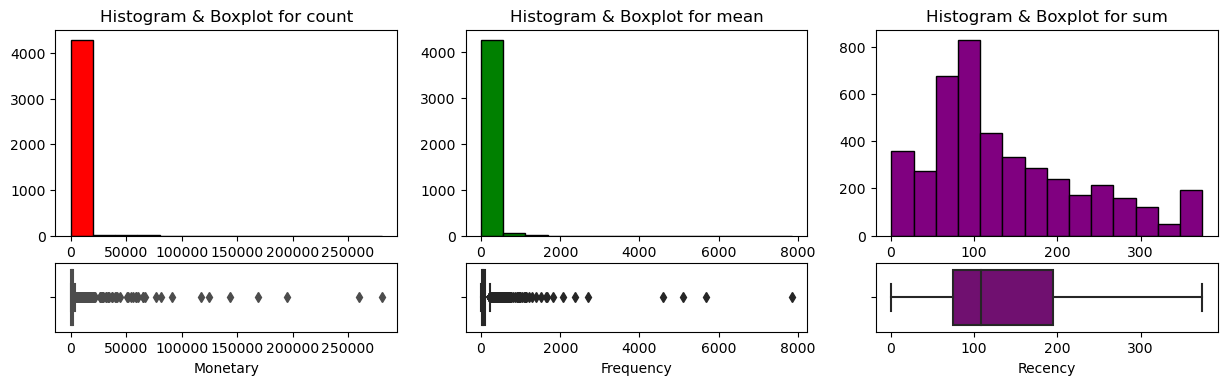

In [750]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, 
                         figsize = (15, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Total Price (Monesty)
axis[0, 0].hist(df_final['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = df_final,  color = 'red', ax = axis[1, 0])
axis[0, 0].set_title("Histogram & Boxplot for count")

# Frequency
axis[0, 1].hist(df_final['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = df_final,  color = 'green', ax = axis[1, 1])
axis[0, 1].set_title("Histogram & Boxplot for mean")

# Recency
axis[0, 2].hist(df_final['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
sns.boxplot(x = 'Recency', data = df_final,  color = 'purple', ax = axis[1, 2])
axis[0, 2].set_title("Histogram & Boxplot for sum")

plt.show()



Total Price and Frequency columns contain highly skewed values which indicates possibility of outliers.

Treating likely outliers in the Total Price column with the inter-quartile range (IQR) metric.

In [751]:
def treating_outliers(df, col):
    col_q1 = df[col].quantile(0.25)
    col_q3 = df[col].quantile(0.75)
    col_iqr = col_q3 - col_q1
    new_df = df[(df[col] >= col_q1 - 1.5 * col_iqr) & (df[col] <= col_q3 + 1.5 * col_iqr)]
    return new_df

# new_df = treating_outliers(selected_customers, 'count')
# new_df = treating_outliers(selected_customers, 'mean')
new_df = treating_outliers(df_final, 'Monetary')
new_df = new_df.reset_index(drop = True)
new_df

,CustomerID,Monetary,Frequency,Recency
0,12348.0,1797.24,31,75
1,12349.0,1757.55,73,19
2,12350.0,334.40,17,310
3,12352.0,2506.04,85,72
4,12353.0,89.00,4,204
...,...,...,...,...
3907,18280.0,180.60,10,278
3908,18281.0,80.82,7,181
3909,18282.0,178.05,12,126
3910,18283.0,2094.88,756,96


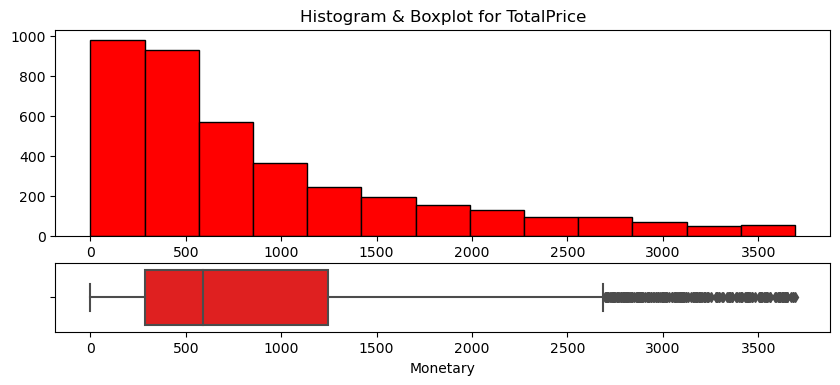

In [752]:
fig, axis_mon = plt.subplots(nrows = 2, ncols = 1, 
                         figsize = (10, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis_mon[0].hist(new_df['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = new_df,  color = 'red', ax = axis_mon[1])
axis_mon[0].set_title("Histogram & Boxplot for TotalPrice")

plt.show()

Lets Calculate RFM Score

In [753]:
new_df

,CustomerID,Monetary,Frequency,Recency
0,12348.0,1797.24,31,75
1,12349.0,1757.55,73,19
2,12350.0,334.40,17,310
3,12352.0,2506.04,85,72
4,12353.0,89.00,4,204
...,...,...,...,...
3907,18280.0,180.60,10,278
3908,18281.0,80.82,7,181
3909,18282.0,178.05,12,126
3910,18283.0,2094.88,756,96


lets score Recency, Frequency, Monetary

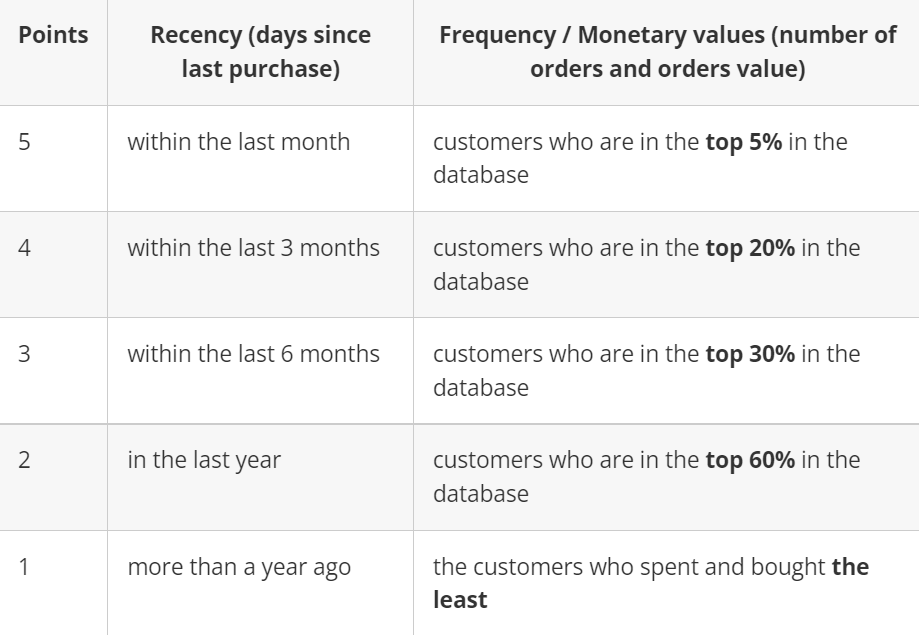

ref - https://www.omniconvert.com/blog/rfm-analysis/

In [754]:
Recency_score = []

for values in new_df['Recency']:
    
    if values<=30:               #less than 30 days
        Recency_score.append(5)
        
    elif (values>30) and (values<=90):  #betwee 30 to 90 days 
        Recency_score.append(4)
        
    elif (values>90) and (values<=180): #between 90 to 180 days
        Recency_score.append(3)
        
    elif (values>180) and (values<=365): #betweeen 180 to 1 year
        Recency_score.append(2)
        
    else:
        Recency_score.append(1)  #more than 1 year
        
new_df['Recency_Score'] = Recency_score
        
        
        
        
        

In [755]:
new_df

,CustomerID,Monetary,Frequency,Recency,Recency_Score
0,12348.0,1797.24,31,75,4
1,12349.0,1757.55,73,19,5
2,12350.0,334.40,17,310,2
3,12352.0,2506.04,85,72,4
4,12353.0,89.00,4,204,2
...,...,...,...,...,...
3907,18280.0,180.60,10,278,2
3908,18281.0,80.82,7,181,2
3909,18282.0,178.05,12,126,3
3910,18283.0,2094.88,756,96,3


<AxesSubplot:xlabel='Recency_Score', ylabel='count'>

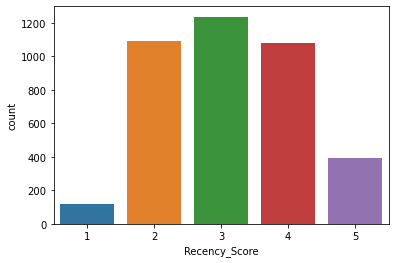

In [756]:
sns.countplot(x = "Recency_Score", data = new_df )

In [757]:
new_df["Monetary_Rank"] = new_df["Monetary"].rank(method ='average', ascending = False)
new_df["Frequency_Rank"] = new_df["Frequency"].rank(method ='average', ascending = False)
new_df

,CustomerID,Monetary,Frequency,Recency,Recency_Score,Monetary_Rank,Frequency_Rank
0,12348.0,1797.24,31,75,4,579.0,2104.5
1,12349.0,1757.55,73,19,5,607.0,1069.5
2,12350.0,334.40,17,310,2,2683.0,2844.5
3,12352.0,2506.04,85,72,4,275.0,904.0
4,12353.0,89.00,4,204,2,3796.0,3714.5
...,...,...,...,...,...,...,...
3907,18280.0,180.60,10,278,2,3349.0,3301.0
3908,18281.0,80.82,7,181,2,3808.0,3513.5
3909,18282.0,178.05,12,126,3,3366.0,3156.0
3910,18283.0,2094.88,756,96,3,424.0,2.0


In [758]:
Monetary_score = []

for values in new_df["Monetary_Rank"]:
    
    if values<(0.05 * new_df.shape[0]): #top5 Rank
        Monetary_score.append(5)
        
    elif (values>(0.05 * new_df.shape[0])) and (values<(0.2 * new_df.shape[0])): #between top5- top20
        Monetary_score.append(4)
        
    elif (values>(0.2 * new_df.shape[0])) and (values<(0.3 * new_df.shape[0])): #between top20- top30
        Monetary_score.append(3)
        
    elif (values>(0.03 * new_df.shape[0])) and (values<(0.6 * new_df.shape[0])): #between top30-top60
        Monetary_score.append(2)
        
    else:
        Monetary_score.append(1) #greater than top60
        
        
        
new_df['Monetary_score'] = Monesty_score
        
        
        

<AxesSubplot:xlabel='Monetary_score', ylabel='count'>

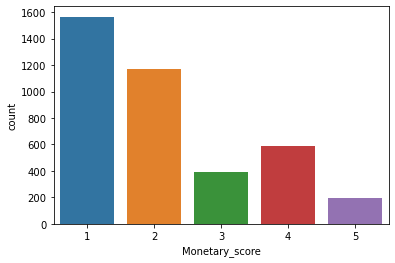

In [759]:
sns.countplot(x = "Monetary_score", data = new_df )

In [760]:
Frequency_score = []

for values in new_df["Frequency_Rank"]:
    
    if values<(0.05 * new_df.shape[0]):    #top5
        Frequency_score.append(5)
        
    elif (values>(0.05 * new_df.shape[0])) and (values<(0.2 * new_df.shape[0])):  #between top5-top20
        Frequency_score.append(4)
        
    elif (values>(0.2 * new_df.shape[0])) and (values<(0.3 * new_df.shape[0])):  #between top20 - top30
        Frequency_score.append(3)
        
    elif (values>(0.03 * new_df.shape[0])) and (values<(0.6 * new_df.shape[0])): #between top 30- top60
        Frequency_score.append(2)
        
    else:
        Frequency_score.append(1)  #more than top 60
        
        
        
new_df['Frequency_Score'] = Frequency_score
        
        

In [761]:
new_df

,CustomerID,Monetary,Frequency,Recency,Recency_Score,Monetary_Rank,Frequency_Rank,Monetary_score,Frequency_Score
0,12348.0,1797.24,31,75,4,579.0,2104.5,4,2
1,12349.0,1757.55,73,19,5,607.0,1069.5,4,3
2,12350.0,334.40,17,310,2,2683.0,2844.5,1,1
3,12352.0,2506.04,85,72,4,275.0,904.0,4,3
4,12353.0,89.00,4,204,2,3796.0,3714.5,1,1
...,...,...,...,...,...,...,...,...,...
3907,18280.0,180.60,10,278,2,3349.0,3301.0,1,1
3908,18281.0,80.82,7,181,2,3808.0,3513.5,1,1
3909,18282.0,178.05,12,126,3,3366.0,3156.0,1,1
3910,18283.0,2094.88,756,96,3,424.0,2.0,4,5


<AxesSubplot:xlabel='Frequency_Score', ylabel='count'>

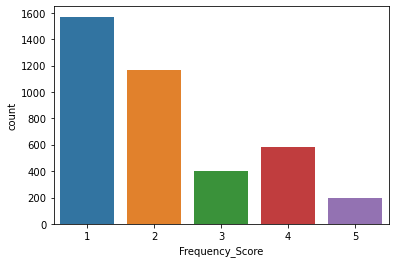

In [762]:
sns.countplot(x = "Frequency_Score", data = new_df )

In [763]:
new_df.drop(["Monetary_Rank",'Frequency_Rank'], axis=1, inplace=True)

In [764]:
new_df

,CustomerID,Monetary,Frequency,Recency,Recency_Score,Monetary_score,Frequency_Score
0,12348.0,1797.24,31,75,4,4,2
1,12349.0,1757.55,73,19,5,4,3
2,12350.0,334.40,17,310,2,1,1
3,12352.0,2506.04,85,72,4,4,3
4,12353.0,89.00,4,204,2,1,1
...,...,...,...,...,...,...,...
3907,18280.0,180.60,10,278,2,1,1
3908,18281.0,80.82,7,181,2,1,1
3909,18282.0,178.05,12,126,3,1,1
3910,18283.0,2094.88,756,96,3,4,5


In [765]:
new_df['RFM Score'] = new_df['Recency_Score'].map(str) + new_df['Frequency_Score'].map(str) + new_df['Monetary_score'].map(str)
new_df.head()

,CustomerID,Monetary,Frequency,Recency,Recency_Score,Monetary_score,Frequency_Score,RFM Score
0,12348.0,1797.24,31,75,4,4,2,424
1,12349.0,1757.55,73,19,5,4,3,534
2,12350.0,334.40,17,310,2,1,1,211
3,12352.0,2506.04,85,72,4,4,3,434
4,12353.0,89.00,4,204,2,1,1,211


Below are Reference

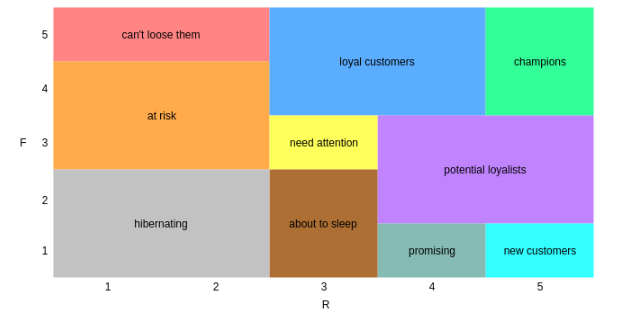

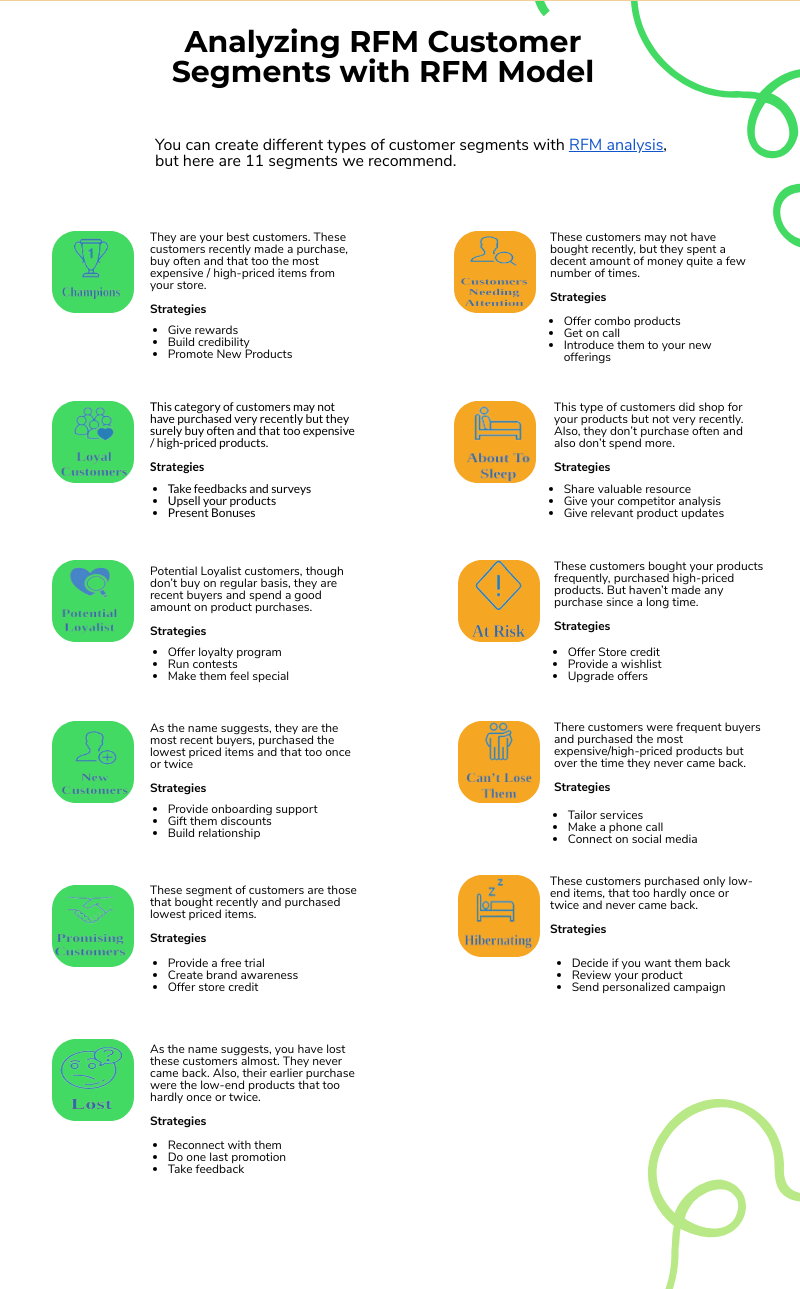

lets combined the score of Frequency and Monetary

In [766]:
new_df["Combined_score"] = round((new_df['Frequency_Score'] + new_df["Monetary_score"])/2)

In [767]:
new_df['Combined_score'] = new_df['Combined_score'].astype(int)

In [768]:
new_df

,CustomerID,Monetary,Frequency,Recency,Recency_Score,Monetary_score,Frequency_Score,RFM Score,Combined_score
0,12348.0,1797.24,31,75,4,4,2,424,3
1,12349.0,1757.55,73,19,5,4,3,534,4
2,12350.0,334.40,17,310,2,1,1,211,1
3,12352.0,2506.04,85,72,4,4,3,434,4
4,12353.0,89.00,4,204,2,1,1,211,1
...,...,...,...,...,...,...,...,...,...
3907,18280.0,180.60,10,278,2,1,1,211,1
3908,18281.0,80.82,7,181,2,1,1,211,1
3909,18282.0,178.05,12,126,3,1,1,311,1
3910,18283.0,2094.88,756,96,3,4,5,354,4


below operation is based on the graph which i inserted above, the graph has two axis Recency on X-axis and frequency on Y-axis but instead on considering Frequency only i consider combine score of Frequency and Monetary.

In [769]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': "Can't loose",
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}



new_df['Segment'] = new_df['Recency_Score'].map(str) + new_df['Combined_score'].map(str)
new_df['Segment'] = new_df['Segment'].replace(segt_map, regex=True)
    
new_df



,CustomerID,Monetary,Frequency,Recency,Recency_Score,Monetary_score,Frequency_Score,RFM Score,Combined_score,Segment
0,12348.0,1797.24,31,75,4,4,2,424,3,Potential loyalists
1,12349.0,1757.55,73,19,5,4,3,534,4,Champions
2,12350.0,334.40,17,310,2,1,1,211,1,Hibernating
3,12352.0,2506.04,85,72,4,4,3,434,4,Loyal customers
4,12353.0,89.00,4,204,2,1,1,211,1,Hibernating
...,...,...,...,...,...,...,...,...,...,...
3907,18280.0,180.60,10,278,2,1,1,211,1,Hibernating
3908,18281.0,80.82,7,181,2,1,1,211,1,Hibernating
3909,18282.0,178.05,12,126,3,1,1,311,1,About to sleep
3910,18283.0,2094.88,756,96,3,4,5,354,4,Loyal customers


In [641]:
new_df['Segment'].unique()

array(['Potential loyalists', 'Champions', 'Hibernating',
       'Loyal customers', 'At risk', 'About to sleep', 'New customers',
       'Need attention', 'Promising', "Can't loose"], dtype=object)

<AxesSubplot:xlabel='Segment', ylabel='count'>

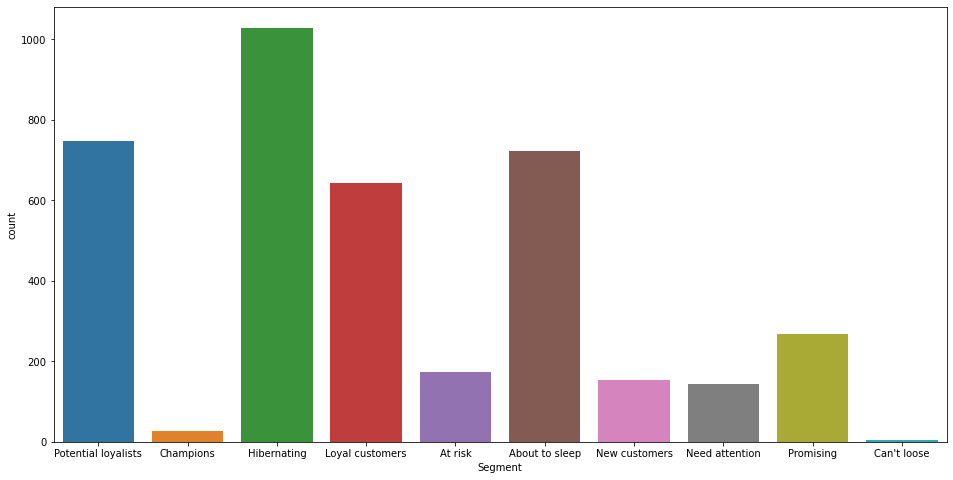

In [642]:
fig = plt.gcf()
fig.set_size_inches( 16, 8)
plt.xticks(rotation=0)
sns.countplot(x = "Segment", data = new_df,  )

In [643]:
new_df = new_df[["Monetary","Frequency", "Recency", "Segment"]]
new_df

,Monetary,Frequency,Recency,Segment
0,1797.24,31,75,Potential loyalists
1,1757.55,73,19,Champions
2,334.40,17,310,Hibernating
3,2506.04,85,72,Loyal customers
4,89.00,4,204,Hibernating
...,...,...,...,...
3907,180.60,10,278,Hibernating
3908,80.82,7,181,Hibernating
3909,178.05,12,126,About to sleep
3910,2094.88,756,96,Loyal customers


Data belong to cant't loose category is too less, lets remove it

## Model Building

In [675]:
data = new_df.copy(deep = True)
data

,level_0,index,Monetary,Frequency,Recency,Segment
0,0,0,1797.24,31,75,Potential loyalists
1,1,1,1757.55,73,19,Champions
2,2,2,334.40,17,310,Hibernating
3,3,3,2506.04,85,72,Loyal customers
4,4,4,89.00,4,204,Hibernating
...,...,...,...,...,...,...
3903,3903,3907,180.60,10,278,Hibernating
3904,3904,3908,80.82,7,181,Hibernating
3905,3905,3909,178.05,12,126,About to sleep
3906,3906,3910,2094.88,756,96,Loyal customers


cant loose has very low value counts lets remove it.

In [676]:
data.drop(data[data['Segment']=="Can't loose"].index.tolist(),inplace=True)

In [685]:
label_encoder = preprocessing.LabelEncoder()

In [686]:
data['Segment']= label_encoder.fit_transform(data['Segment'])

In [687]:
data

,level_0,index,Monetary,Frequency,Recency,Segment
0,0,0,1797.24,31,75,7
1,1,1,1757.55,73,19,2
2,2,2,334.40,17,310,3
3,3,3,2506.04,85,72,4
4,4,4,89.00,4,204,3
...,...,...,...,...,...,...
3903,3903,3907,180.60,10,278,3
3904,3904,3908,80.82,7,181,3
3905,3905,3909,178.05,12,126,0
3906,3906,3910,2094.88,756,96,4


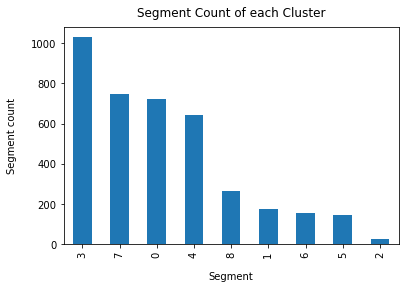

In [688]:
data['Segment'].value_counts().plot(kind='bar');
plt.xlabel("Segment", labelpad=14)
plt.ylabel("Segment count", labelpad=14)
plt.title("Segment Count of each Cluster", y=1.02);

In [689]:
columns = ['Monetary', 'Frequency', 'Recency']

X = data[columns]
Y = data['Segment']


In [690]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

Class=7, n=1029 (11.111%)
Class=2, n=1029 (11.111%)
Class=3, n=1029 (11.111%)
Class=4, n=1029 (11.111%)
Class=1, n=1029 (11.111%)
Class=0, n=1029 (11.111%)
Class=6, n=1029 (11.111%)
Class=5, n=1029 (11.111%)
Class=8, n=1029 (11.111%)


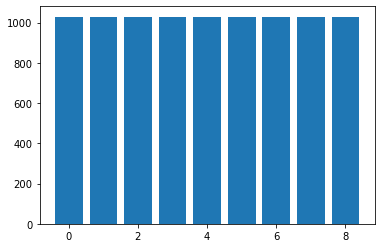

In [691]:
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [692]:
scalar = preprocessing.StandardScaler()
X_scaled = scalar.fit_transform(X)

In [693]:
X_scaled

array([[ 0.86485005, -0.54964896, -0.40514042],
       [ 0.82017729, -0.04168819, -1.01217508],
       [-0.78163779, -0.71896922,  2.1422372 ],
       ...,
       [-1.07456715, -0.86410087, -0.48101975],
       [-0.75519652, -0.69478061, -0.28590146],
       [-1.04019979, -0.81572365, -0.78453708]])

In [694]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.30, random_state= 355)

## Random Forest Classifier

In [695]:
rand_clf = RandomForestClassifier(random_state=6)

In [696]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [697]:
print("Train Accuracy:",rand_clf.score(x_train, y_train))
print("Test Accuracy:",rand_clf.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9985606333213386


In [698]:
y_pred=rand_clf.predict(x_test)

In [699]:
Random_precision = precision_score(y_test, y_pred, average='micro')
Random_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',Random_precision)
print('Recall: ',Random_recall)


Precision:  0.9985606333213386
Recall:  0.9985606333213386


In [700]:
Random_Cross = cross_val_score(rand_clf, X, Y, cv=10, scoring="accuracy").mean()
Random_Cross

0.9983802460851676

## SVC

In [701]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [702]:
print("Train Accuracy:",svm.score(x_train, y_train))
print("Test Accuracy:",svm.score(x_test, y_test))

Train Accuracy: 0.9563406356062943
Test Accuracy: 0.9521410579345088


In [703]:
y_pred=svm.predict(x_test)

In [704]:
svc_precision = precision_score(y_test, y_pred, average='micro')
svc_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',svc_precision)
print('Recall: ',svc_recall)


Precision:  0.9521410579345088
Recall:  0.9521410579345088


In [705]:
svc_cross = cross_val_score(svm, X, Y, cv=10, scoring="accuracy").mean()
svc_cross

0.8553074200665888

## KNN

In [706]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)


KNeighborsClassifier()

In [707]:
y_pred=knn.predict(x_test)

In [708]:
print("Train Accuracy:",knn.score(x_train, y_train))
print("Test Accuracy:",knn.score(x_test, y_test))

Train Accuracy: 0.9842641160135761
Test Accuracy: 0.9733717164447643


In [709]:
Knn_precision = precision_score(y_test, y_pred, average='micro')
Knn_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',Knn_precision)
print('Recall: ',Knn_recall)


Precision:  0.9733717164447643
Recall:  0.9733717164447643


In [710]:
knn_cross = cross_val_score(knn, X, Y, cv=10, scoring="accuracy").mean()
knn_cross

0.958644667649889

## Naive Bayes

In [711]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [712]:
print("Train Accuracy:",model.score(x_train, y_train))
print("Test Accuracy:",model.score(x_test, y_test))

Train Accuracy: 0.8989509410675718
Test Accuracy: 0.9006836991723641


In [713]:
y_pred=model.predict(x_test)

In [714]:
Nb_precision = precision_score(y_test, y_pred, average='micro')
Nb_recall = recall_score(y_test, y_pred, average='micro')

print('Precision: ',Nb_precision)
print('Recall: ',Nb_recall)


Precision:  0.9006836991723641
Recall:  0.9006836991723641


In [715]:
Nb_Cross = cross_val_score(model, X, Y, cv=10, scoring="accuracy").mean()
Nb_Cross

0.8996877919669339

In [716]:
Model = {'Model_Name':['RandomForest', 'SVC', 'KNN', 'Naive Bayes'],
        'Precision':[Random_precision, svc_precision, Knn_precision, Nb_precision],
        "Recall":[Random_recall, svc_recall, Knn_recall, Nb_recall],
        "Cross_Validation":[Random_Cross, svc_cross,knn_cross,Nb_Cross]}

df = pd.DataFrame(Model)
df

,Model_Name,Precision,Recall,Cross_Validation
0,RandomForest,0.998561,0.998561,0.998380
1,SVC,0.952141,0.952141,0.855307
2,KNN,0.973372,0.973372,0.958645
3,Naive Bayes,0.900684,0.900684,0.899688


In [717]:
fig = px.line(df, x='Model_Name', y='Precision', text="Precision", title='Precision Score for different model')
fig.show()

In [718]:
fig = px.line(df, x='Model_Name', y='Cross_Validation', text="Cross_Validation", title='Cross Validation Score for different model')
fig.show()